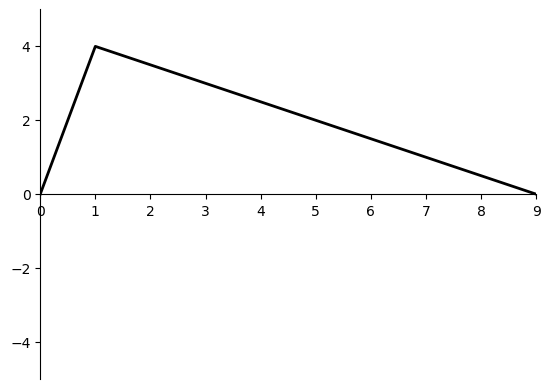

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# set the parameters
c = 0.5
L = 9
h = 4
d = 1

# set the axes
ax.set_xlim(0, L)
ax.set_ylim(-h-1, h+1)
# hide the extra 2 axes
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
# set the axes origion point
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))

# initialize
x = np.linspace(0, L, 100)
y = []

# calculate y[0]
for i in range(len(x)):
    if (x[i]<d):
        y.append((h/d)*x[i])
    else:
        y.append((h/(d-L))*x[i]-L*h/(d-L))

y = np.array(y)
y_pre = np.copy(y)
plt.plot(x, y, 'k-', linewidth=2)

# calculate y[1]
for j in range(len(x)):
    if j == 0 or j == len(x)-1:
        y[j] = 0
    else:
        y[j] = y_pre[j] + (c**2)*(y_pre[j+1]-2*y_pre[j]+y_pre[j-1])/2      
y_pre = np.copy(y)

# update new time level
def update(frame):
    global y_pre
    if frame == 0:
        return line, 
    temp = np.copy(y)
    for j in range(len(x)):
        if j == 0 or j == len(x)-1:
            y[j] = 0
        else:
            y[j] = -y_pre[j] + 2*temp[j] + (c**2)*(temp[j+1]-2*temp[j]+temp[j-1])
    y_pre = temp
    line.set_data(x, y)
    return line, 

line, = ax.plot([], [], "b-")

ani = FuncAnimation(fig, update, frames=2000, interval=20, blit=True)
#ani.save('string_int.gif',writer='imagemagick')

plt.show()

